PROJECT NEURAL INFORMATION RETRIEVAL

Packages

In [1]:
# Top-level imports
import numpy as np
import pandas as pd
import pyterrier_doc2query
import gzip
# Activate PyTerrier
import pyterrier as pt
if not pt.started():
    pt.init(boot_packages=["com.github.terrierteam:terrier-prf:-SNAPSHOT"])  # Initialisation package for RM3

PyTerrier 0.9.2 has loaded Terrier 5.7 (built by craigm on 2022-11-10 18:30) and terrier-helper 0.0.7



In [ ]:
np.random.seed(68)

Dataset and indexing

In [8]:
data = pt.get_dataset('msmarco_document')
# #full index
# indexer_tot = pt.TRECCollectionIndexer(r"C:\Users\giorg\Desktop\Project\full_index", verbose=True,
#                                        stemmer = 'none', stopwords = 'none')
#stopword removed index
#indexer_stop = pt.TRECCollectionIndexer(r"C:\Users\giorg\Desktop\Project\no_stop", verbose=True,
#                                          stopwords = 'terrier',stemmer = 'none',overwrite = True)
# #stemming index
#indexer_stem = pt.TRECCollectionIndexer(r"C:\Users\giorg\Desktop\Project\stem", verbose=True,
#                                          stemmer = 'porter',stopwords = 'none',overwrite = True)
# #stopword removed and stemming index
# indexer_stem_stop = pt.TRECCollectionIndexer(r"C:\Users\giorg\Desktop\Project\stem_no_stop", verbose=True,
#                                               stemmer = 'porter',stopwords = 'terrier')

In [4]:
# #full_index
# indexref = indexer_tot.index(data.get_corpus())

In [5]:
# #stopword removed index
#indexref_stop = indexer_stop.index(data.get_corpus())

2files [1:45:51, 3175.95s/files]        


In [23]:
# #stemming index
#indexref_stem = indexer_stem.index(data.get_corpus())

C:\Users\giorg\AppData\Local\Temp\ipykernel_10048\2226939380.py:2: DeprecationWarning: Setting of termpipelines property directly is deprecated
  indexref_stem = indexer_stem.index(data.get_corpus())
C:\Users\giorg\AppData\Local\Temp\ipykernel_10048\2226939380.py:2: DeprecationWarning: Setting of tokeniser property directly is deprecated
  indexref_stem = indexer_stem.index(data.get_corpus())
2files [2:21:23, 4241.98s/files]        


In [ ]:
# indexer_stem_stop = pt.TRECCollectionIndexer(r"C:\Users\giorg\Desktop\Project\stem_no_stop", verbose=True,
#                                                stemmer = 'porter',stopwords = 'terrier')
# indexref_stem_stop = indexer_stem_stop.index(data.get_corpus())

In [7]:
# #stopword removed and stemming index
# indexref_stem_stop = indexer_stem_stop.index(data.get_corpus())

In [9]:
#collection of indexes
index_full = pt.IndexFactory.of(r"C:\Users\giorg\Desktop\Project\full_index")
index_stop = pt.IndexFactory.of(r"C:\Users\giorg\Desktop\Project\no_stop")
index_stem = pt.IndexFactory.of(r"C:\Users\giorg\Desktop\Project\stem")
index_stem_stop = pt.IndexFactory.of(r"C:\Users\giorg\Desktop\Project\stem_no_stop")

In [10]:
#get topics
queries = data.get_topics(variant = 'train')
queries['qid'] = queries['qid'].astype(int)
queries.tail(20)

,qid,query
366993,266116,how long potty train puppy
366994,1164804,what causes dogs eyes to run
366995,714053,what is an ethical interpretation
366996,673394,what is a mao inhibitor
366997,496447,should i fast before a liver blood test
366998,474267,pharmacist salary in oregon
366999,676978,what is a chain of custody mag
367000,721793,what is b17
367001,1164803,what causes dropped frames
367002,462670,natural remedies for grover s disease


In [11]:
qrels = data.get_qrels(variant='train')
qrels.head(5)

,qid,docno,label
0,3,D312959,1
1,5,D140227,1
2,12,D213890,1
3,15,D1033338,1
4,16,D508131,1


In [12]:
q_sample = pd.read_csv(r"C:\Users\giorg\Desktop\Project\msmarco-doctrain-queries-sample-qid.tsv",header=None, names=['qid'])
q_sample['qid'] = q_sample['qid'].astype(int)

Statistics

In [12]:
print(index_full.getCollectionStatistics().toString())

Number of documents: 3213835
Number of terms: 17470544
Number of postings: 1234274977
Number of fields: 0
Number of tokens: 3667907097
Field names: []
Positions:   false



count    367013.000000
mean         33.004591
std          12.862694
min           5.000000
25%          24.000000
50%          31.000000
75%          39.000000
max         214.000000
Name: queries_len, dtype: float64


<AxesSubplot:title={'center':'Queries length distribution'}, ylabel='Frequency'>

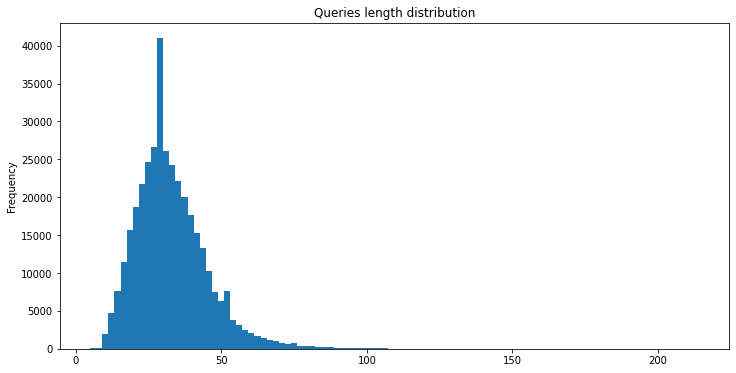

In [13]:
#retrieve queries statistics and plot
queries['queries_len'] = queries['query'].map(len)
print(queries['queries_len'].describe())
queries['queries_len'].plot(kind='hist', bins=100, figsize=(12,6), title='Queries length distribution')


In [63]:
#sample queries with id = q_sample
queries = queries[queries['qid'].isin(q_sample['qid'])]
#transofrm qid to string
queries['qid'] = queries['qid'].map(str)
queries

,qid,query
224,724592,what is blains
230,754337,what is hecate
248,412886,is ilovemakonnen ovo
361,736493,what is cubicin antibiotic for
428,681529,what is a disease that affects the legs
...,...,...
366797,604057,what county is cedar michigan in
366818,553634,what animal eats bamboo shoot
366892,617635,what degree do you need to work at a zoo
366971,479282,pre ejaculatory fluid definition


In [64]:
print(index_full.getCollectionStatistics().toString())

Number of documents: 3213835
Number of terms: 17470544
Number of postings: 1234274977
Number of fields: 0
Number of tokens: 3667907097
Field names: []
Positions:   false



count    5000.000000
mean       32.837200
std        12.701565
min         8.000000
25%        24.000000
50%        31.000000
75%        39.000000
max       189.000000
Name: queries_len, dtype: float64


<AxesSubplot:title={'center':'Queries length distribution'}, ylabel='Frequency'>

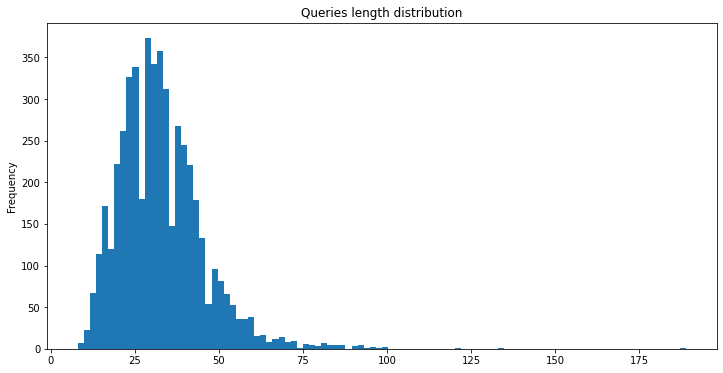

In [65]:
#retrieve queries statistics and plot
queries['queries_len'] = queries['query'].map(len)
print(queries['queries_len'].describe())
queries['queries_len'].plot(kind='hist', bins=100, figsize=(12,6), title='Queries length distribution')

In [8]:
#retrieve documents stat
num_doc = index_full.getCollectionStatistics().getNumberOfDocuments()
print(num_doc)
doc_len=[]
for i in range(num_doc):
    doc = index_full.getDocumentIndex().getDocumentLength(i)
    doc_len.append(doc)
tot = sum(doc_len)

3213835


total number of documents = 3213835
mean = 1141.2866861553252
median = 598.0
min =  2
max =  319457


<AxesSubplot:ylabel='Frequency'>

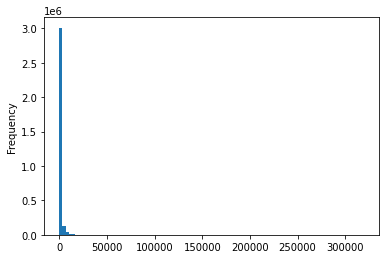

In [15]:
#print statistics and plots
print('total number of documents =', num_doc)
print('mean =',  tot/num_doc)
print('median =', pd.Series(doc_len).median())
print('min = ', pd.Series(doc_len).min())
print('max = ', pd.Series(doc_len).max())
pd.Series(doc_len).plot(kind='hist', bins=100)

In [16]:
num_doc_stop = index_stop.getCollectionStatistics().getNumberOfDocuments()
print(num_doc_stop)

3213835


In [17]:
num_doc_stem = index_stem.getCollectionStatistics().getNumberOfDocuments()
print(num_doc_stem)

3213835


In [18]:
num_doc_stem_stop = index_stem_stop.getCollectionStatistics().getNumberOfDocuments()
print(num_doc_stem_stop)

3213835


In [19]:
#retrieve number of unique terms per index
print(index_full.getCollectionStatistics().getNumberOfUniqueTerms())
print(index_stop.getCollectionStatistics().getNumberOfUniqueTerms())
print(index_stem.getCollectionStatistics().getNumberOfUniqueTerms())
print(index_stem_stop.getCollectionStatistics().getNumberOfUniqueTerms())

17470544
17469900
16168189
16168096


In [20]:
#retrieve total number of terms per index
print(index_full.getCollectionStatistics().getNumberOfTokens())
print(index_stop.getCollectionStatistics().getNumberOfTokens())
print(index_stem.getCollectionStatistics().getNumberOfTokens())
print(index_stem_stop.getCollectionStatistics().getNumberOfTokens())

3667907097
2204592607
3667907097
2204592607


<AxesSubplot:ylabel='Frequency'>

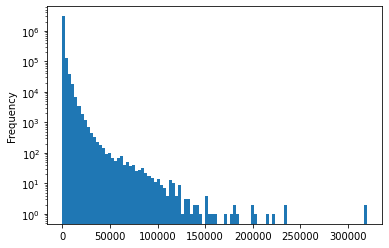

In [21]:
pd.Series(doc_len).plot(kind='hist', bins=100, logy=True)

<AxesSubplot:ylabel='Frequency'>

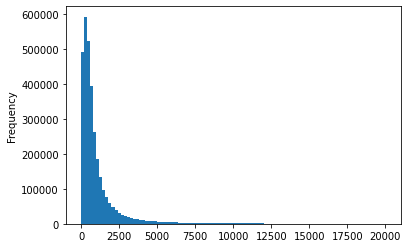

In [22]:
pd.Series(doc_len).plot(kind='hist', bins=100, range=(0,20000))

In [13]:
#sample queries with id = q_sample
queries = queries[queries['qid'].isin(q_sample['qid'])]
#transofrm qid to string
queries['qid'] = queries['qid'].map(str)
queries

,qid,query
224,724592,what is blains
230,754337,what is hecate
248,412886,is ilovemakonnen ovo
361,736493,what is cubicin antibiotic for
428,681529,what is a disease that affects the legs
...,...,...
366797,604057,what county is cedar michigan in
366818,553634,what animal eats bamboo shoot
366892,617635,what degree do you need to work at a zoo
366971,479282,pre ejaculatory fluid definition


In [10]:
#taking random 0.05% of queries
queries_test = queries.sample(frac=0.01, random_state=1)

In [11]:
#batch retrieval
bm25_full = pt.BatchRetrieve(index_full, wmodel="BM25")
bm25_stop = pt.BatchRetrieve(index_stop, wmodel="BM25")
bm25_stem = pt.BatchRetrieve(index_stem, wmodel="BM25")
bm25_stem_stop = pt.BatchRetrieve(index_stem_stop, wmodel="BM25")

In [12]:
#is queries id int or string?
queries_test['qid'] = queries_test['qid'].map(str)
queries_test.shape

(50, 2)

In [ ]:
#sample queries with id = q_sample
queries = queries[queries['qid'].isin(q_sample['qid'])]
#transofrm qid to string
queries['qid'] = queries['qid'].map(str)
queries

In [96]:
BM25_full = pt.BatchRetrieve(index_stem_stop, wmodel="BM25", controls={"bm25.b" : 0.75,"bm25.k_1": 0.5})
LM_full = pt.BatchRetrieve(index_stem_stop, wmodel="DirichletLM", controls={"dirichletlm.mu" : 1141})
BM25_doc2 = pt.BatchRetrieve(index_doc2, wmodel="BM25", controls={"bm25.b" : 0.75,"bm25.k_1": 0.5})
LM_doc2 = pt.BatchRetrieve(index_doc2, wmodel="DirichletLM", controls={"dirichletlm.mu" : 1141})

In [97]:
#experiment
pt.Experiment([BM25_full,LM_full, BM25_doc2,LM_doc2], queries_test, qrels,eval_metrics=['map','mrt'], batch_size= 32 ,verbose = True)

pt.Experiment: 100%|██████████| 8/8 [01:13<00:00,  9.15s/batches]


,name,map,mrt
0,BR(BM25),0.260386,170.943602
1,BR(DirichletLM),0.258052,112.387806
2,BR(BM25),0.260439,574.379036
3,BR(DirichletLM),0.258264,591.258194


In [26]:
#experiment
pt.Experiment([bm25_full,bm25_stop,bm25_stem,bm25_stem_stop], queries_test, qrels,eval_metrics=['map','mrt'], batch_size= 32 ,verbose = True)

pt.Experiment: 100%|██████████| 8/8 [00:58<00:00,  7.37s/batches]


,name,map,mrt
0,BR(BM25),0.250612,503.929338
1,BR(BM25),0.258941,73.663334
2,BR(BM25),0.238214,502.269110
3,BR(BM25),0.270294,90.790410


2 Ranking Models and Evaluation

In [14]:
#splitting queries in 3 groups with same lenght for cross validation
queries['group'] = np.random.randint(0, 3, queries.shape[0])
train_1 = queries[queries['group'] != 0]
val_1 = queries[queries['group'] == 0]
train_2 = queries[queries['group'] != 1]
val_2 = queries[queries['group'] == 1]
train_3 = queries[queries['group'] != 2]
val_3 = queries[queries['group'] == 2]
queries['group'].value_counts()

2    1669
1    1668
0    1663
Name: group, dtype: int64

In [15]:
metrics_list = ['recip_rank','ndcg_cut_10','P_5','P_10','P_20','recall_5','recall_10','recall_20','mrt']

Full Index

In [28]:
BM25_full = pt.BatchRetrieve(index_full, wmodel="BM25", controls={"bm25.b" : 0.75,"bm25.k_1": 0.5})
LM_full = pt.BatchRetrieve(index_full, wmodel="DirichletLM", controls={"dirichletlm.mu" : 1141})

In [66]:
t_1_bm = pt.KFoldGridSearch(
    BM25_full,
    {BM25_full : {'bm25.b' : [0.25, 0.75],'bm25.k_1' : [0.5, 1.5]}},
    [train_1, train_2, train_3],
    qrels,
    'ndcg_cut_10'
)

Fold 1
Best ndcg_cut_10 is 0.003108
Best setting is ['BR(BM25) bm25.b=0.75', 'BR(BM25) bm25.k_1=1.5']
Fold 2
Best ndcg_cut_10 is 0.003108
Best setting is ['BR(BM25) bm25.b=0.75', 'BR(BM25) bm25.k_1=1.5']
Fold 3
Best ndcg_cut_10 is 0.003108
Best setting is ['BR(BM25) bm25.b=0.75', 'BR(BM25) bm25.k_1=1.5']


In [70]:
t_1_lm = pt.KFoldGridSearch(
    LM_full,
    {LM_full : {"dirichletlm.mu" : [400,598,900,1141,1500]}},
    [train_1, train_2, train_3],
    qrels,
    'ndcg_cut_10'
)

Fold 1
Best ndcg_cut_10 is 0.003584
Best setting is ['BR(DirichletLM) dirichletlm.mu=400']
Fold 2
Best ndcg_cut_10 is 0.003584
Best setting is ['BR(DirichletLM) dirichletlm.mu=400']
Fold 3
Best ndcg_cut_10 is 0.003584
Best setting is ['BR(DirichletLM) dirichletlm.mu=400']


In [42]:
bm25_full_best = pt.BatchRetrieve(index_full, wmodel="BM25", controls={"bm25.b" : 0.75,"bm25.k_1": 1.5})
lm_full_best = pt.BatchRetrieve(index_full, wmodel="DirichletLM", controls={"Dirichletlm.mu" : 400})

In [45]:
pt.Experiment(
    [bm25_full_best,BM25_full,lm_full_best,LM_full],
    val_1,
    qrels,
    eval_metrics=metrics_list,
    names=['BM25 b = 0.75 k1 = 1.5','BM25_full','Dirichlet LM mu = 400','LM_full'],
)
    

,name,recip_rank,ndcg_cut_10,P_5,P_10,P_20,recall_5,recall_10,recall_20,mrt
0,BM25 b = 0.75 k1 = 1.5,0.193182,0.230569,0.056673,0.039062,0.024528,0.283364,0.390615,0.490555,418.573783
1,BM25_full,0.166105,0.195945,0.048873,0.033211,0.021024,0.244363,0.332115,0.420475,410.140432
2,Dirichlet LM mu = 400,0.202656,0.239472,0.060207,0.040158,0.025807,0.301036,0.401584,0.516149,448.215546
3,LM_full,0.228704,0.269240,0.067276,0.043693,0.026417,0.336380,0.436929,0.528336,447.919589


In [46]:
pt.Experiment(
    [bm25_full_best,BM25_full,lm_full_best,LM_full],
    val_2,
    qrels,
    eval_metrics=metrics_list,
    names=['BM25 b = 0.75 k1 = 1.5','BM25_full','Dirichlet LM mu = 400','LM_full'],
)
    

,name,recip_rank,ndcg_cut_10,P_5,P_10,P_20,recall_5,recall_10,recall_20,mrt
0,BM25 b = 0.75 k1 = 1.5,0.191211,0.233325,0.059920,0.040709,0.024528,0.299600,0.407090,0.490566,418.168634
1,BM25_full,0.161495,0.198512,0.050543,0.035735,0.022184,0.252716,0.357347,0.443682,413.159124
2,Dirichlet LM mu = 400,0.201954,0.242723,0.060949,0.041910,0.026072,0.304746,0.419097,0.521441,452.872794
3,LM_full,0.214498,0.256729,0.065866,0.043396,0.026672,0.329331,0.433962,0.533448,452.334792


In [47]:
pt.Experiment(
    [bm25_full_best,BM25_full,lm_full_best,LM_full],
    val_3,
    qrels,
    eval_metrics=metrics_list,
    names=['BM25 b = 0.75 k1 = 1.5','BM25_full','Dirichlet LM mu = 400','LM_full'],
)
    

,name,recip_rank,ndcg_cut_10,P_5,P_10,P_20,recall_5,recall_10,recall_20,mrt
0,BM25 b = 0.75 k1 = 1.5,0.186765,0.220127,0.057764,0.036832,0.023292,0.288820,0.368323,0.465839,415.544765
1,BM25_full,0.163588,0.192215,0.049068,0.032360,0.020342,0.245342,0.323602,0.406832,410.566589
2,Dirichlet LM mu = 400,0.195584,0.232996,0.059503,0.039565,0.024472,0.297516,0.395652,0.489441,450.324169
3,LM_full,0.224586,0.263751,0.065342,0.042857,0.025745,0.326708,0.428571,0.514907,450.262006


Stopword removed index

train 1

In [24]:
BM25_stop = pt.BatchRetrieve(index_stop, wmodel="BM25", controls={"bm25.b" : 0.75,"bm25.k_1": 0.5})
LM_stop = pt.BatchRetrieve(index_stop, wmodel="DirichletLM", controls={"dirichletlm.mu" : 1141})

In [72]:
t_1_bm_stop = pt.KFoldGridSearch(
    BM25_stop,
    {BM25_stop : {'bm25.b' : [0.25, 0.75],'bm25.k_1' : [0.5, 1.5]}},
    [train_1, train_2, train_3],
    qrels,
    'ndcg_cut_10'
    )

Fold 1
Best ndcg_cut_10 is 0.003992
Best setting is ['BR(BM25) bm25.b=0.75', 'BR(BM25) bm25.k_1=1.5']
Fold 2
Best ndcg_cut_10 is 0.003992
Best setting is ['BR(BM25) bm25.b=0.75', 'BR(BM25) bm25.k_1=1.5']
Fold 3
Best ndcg_cut_10 is 0.003992
Best setting is ['BR(BM25) bm25.b=0.75', 'BR(BM25) bm25.k_1=1.5']


In [25]:
t_1_lm_stop = pt.KFoldGridSearch(
    LM_stop,
    {LM_stop : {"dirichletlm.mu" : [400,598,900,1141,1500]}},
    [train_1, train_2, train_3],
    qrels,
    'ndcg_cut_10'
    )

Fold 1
Best ndcg_cut_10 is 0.003814
Best setting is ['BR(DirichletLM) dirichletlm.mu=400']
Fold 2
Best ndcg_cut_10 is 0.003814
Best setting is ['BR(DirichletLM) dirichletlm.mu=400']
Fold 3
Best ndcg_cut_10 is 0.003814
Best setting is ['BR(DirichletLM) dirichletlm.mu=400']


In [48]:
bm25_stop_best = pt.BatchRetrieve(index_stop, wmodel="BM25", controls={"bm25.b" : 0.75,"bm25.k_1": 1.5})
lm_stop_best = pt.BatchRetrieve(index_stop, wmodel="DirichletLM", controls={"Dirichletlm.mu" : 400})

In [49]:
pt.Experiment(
    [bm25_stop_best,lm_stop_best],
    val_1,
    qrels,
    eval_metrics=metrics_list,
    names=['BM25 b = 0.75 k1 = 1.5','Dirichlet LM mu = 400'],
)

,name,recip_rank,ndcg_cut_10,P_5,P_10,P_20,recall_5,recall_10,recall_20,mrt
0,BM25 b = 0.75 k1 = 1.5,0.249711,0.295676,0.073492,0.048141,0.028854,0.367459,0.481414,0.577087,63.427553
1,Dirichlet LM mu = 400,0.188335,0.226496,0.057282,0.039366,0.025320,0.286411,0.393662,0.506399,61.829198


In [50]:
pt.Experiment(
    [bm25_stop_best,lm_stop_best],
    val_2,
    qrels,
    eval_metrics=metrics_list,
    names=['BM25 b = 0.75 k1 = 1.5','Dirichlet LM mu = 400'],
)

,name,recip_rank,ndcg_cut_10,P_5,P_10,P_20,recall_5,recall_10,recall_20,mrt
0,BM25 b = 0.75 k1 = 1.5,0.247259,0.295888,0.076043,0.049228,0.029874,0.380217,0.492281,0.597484,60.703413
1,Dirichlet LM mu = 400,0.191200,0.230030,0.058548,0.040080,0.025729,0.292739,0.400800,0.514580,62.048289


In [51]:
pt.Experiment(
    [bm25_stop_best,lm_stop_best],
    val_3,
    qrels,
    eval_metrics=metrics_list,
    names=['BM25 b = 0.75 k1 = 1.5','Dirichlet LM mu = 400'],
)

,name,recip_rank,ndcg_cut_10,P_5,P_10,P_20,recall_5,recall_10,recall_20,mrt
0,BM25 b = 0.75 k1 = 1.5,0.242331,0.287259,0.073416,0.047143,0.028385,0.367081,0.471429,0.567702,61.420564
1,Dirichlet LM mu = 400,0.182977,0.217846,0.054658,0.037578,0.024099,0.273292,0.375776,0.481988,63.114981


Stemmed Index

In [27]:
BM25_stem = pt.BatchRetrieve(index_stem, wmodel="BM25", controls={"bm25.b" : 0.75,"bm25.k_1": 0.5})
LM_stem = pt.BatchRetrieve(index_stem, wmodel="DirichletLM", controls={"dirichletlm.mu" : 1141})

In [29]:
t_1_bm_stem = pt.KFoldGridSearch(
    BM25_stem,
    {BM25_stem : {'bm25.b' : [0.25, 0.75],'bm25.k_1' : [0.5, 1.5]}},
    [train_1, train_2, train_3],
    qrels,
    'ndcg_cut_10'
    )

Fold 1
Best ndcg_cut_10 is 0.002834
Best setting is ['BR(BM25) bm25.b=0.75', 'BR(BM25) bm25.k_1=1.5']
Fold 2
Best ndcg_cut_10 is 0.002834
Best setting is ['BR(BM25) bm25.b=0.75', 'BR(BM25) bm25.k_1=1.5']
Fold 3
Best ndcg_cut_10 is 0.002834
Best setting is ['BR(BM25) bm25.b=0.75', 'BR(BM25) bm25.k_1=1.5']


In [28]:
t_1_lm_stem = pt.KFoldGridSearch(
    LM_stem,
    {LM_stem : {"dirichletlm.mu" : [400,598,900,1141,1500]}},
    [train_1, train_2, train_3],
    qrels,
    'ndcg_cut_10'
    )

Fold 1
Best ndcg_cut_10 is 0.003609
Best setting is ['BR(DirichletLM) dirichletlm.mu=400']
Fold 2
Best ndcg_cut_10 is 0.003609
Best setting is ['BR(DirichletLM) dirichletlm.mu=400']
Fold 3
Best ndcg_cut_10 is 0.003609
Best setting is ['BR(DirichletLM) dirichletlm.mu=400']


In [52]:
bm25_stem_best = pt.BatchRetrieve(index_stem, wmodel="BM25", controls={"bm25.b" : 0.75,"bm25.k_1": 1.5})
lm_stem_best = pt.BatchRetrieve(index_stem, wmodel="DirichletLM", controls={"Dirichletlm.mu" : 400})

In [53]:
pt.Experiment(
    [bm25_stem_best,lm_stem_best],
    val_1,
    qrels,
    eval_metrics=metrics_list,
    names=['BM25 b = 0.75 k1 = 1.5','Dirichlet LM mu = 400']
)

,name,recip_rank,ndcg_cut_10,P_5,P_10,P_20,recall_5,recall_10,recall_20,mrt
0,BM25 b = 0.75 k1 = 1.5,0.176075,0.207396,0.051554,0.034918,0.022578,0.257770,0.349177,0.451554,439.432874
1,Dirichlet LM mu = 400,0.197873,0.234872,0.058501,0.039671,0.024802,0.292505,0.396709,0.496039,471.885116


In [54]:
pt.Experiment(
    [bm25_stem_best,lm_stem_best],
    val_2,
    qrels,
    eval_metrics=metrics_list,
    names=['BM25 b = 0.75 k1 = 1.5','Dirichlet LM mu = 400']
)

,name,recip_rank,ndcg_cut_10,P_5,P_10,P_20,recall_5,recall_10,recall_20,mrt
0,BM25 b = 0.75 k1 = 1.5,0.176938,0.216817,0.055346,0.038308,0.023385,0.276730,0.383076,0.467696,440.694914
1,Dirichlet LM mu = 400,0.197770,0.238743,0.059234,0.041681,0.026158,0.296169,0.416810,0.523156,477.358595


In [55]:
pt.Experiment(
    [bm25_stem_best,lm_stem_best],
    val_3,
    qrels,
    eval_metrics=metrics_list,
    names=['BM25 b = 0.75 k1 = 1.5','Dirichlet LM mu = 400']
)

,name,recip_rank,ndcg_cut_10,P_5,P_10,P_20,recall_5,recall_10,recall_20,mrt
0,BM25 b = 0.75 k1 = 1.5,0.168355,0.199038,0.049689,0.033975,0.022019,0.248447,0.339752,0.440373,439.338365
1,Dirichlet LM mu = 400,0.186378,0.223783,0.056894,0.039006,0.024658,0.284472,0.390062,0.493168,477.714770


Stemmed index with stopwords removed

In [30]:
BM25_stem_stop = pt.BatchRetrieve(index_stem_stop, wmodel="BM25", controls={"bm25.b" : 0.75,"bm25.k_1": 0.5})
LM_stem_stop = pt.BatchRetrieve(index_stem_stop, wmodel="DirichletLM", controls={"dirichletlm.mu" : 1141})

In [31]:
t_1_bm_stem_stop = pt.KFoldGridSearch(
    BM25_stem_stop,
    {BM25_stem_stop : {'bm25.b' : [0.25, 0.75],'bm25.k_1' : [0.5, 1.5]}},
    [train_1, train_2, train_3],
    qrels,
    'ndcg_cut_10'
    )

Fold 1
Best ndcg_cut_10 is 0.004052
Best setting is ['BR(BM25) bm25.b=0.75', 'BR(BM25) bm25.k_1=1.5']
Fold 2
Best ndcg_cut_10 is 0.004052
Best setting is ['BR(BM25) bm25.b=0.75', 'BR(BM25) bm25.k_1=1.5']
Fold 3
Best ndcg_cut_10 is 0.004052
Best setting is ['BR(BM25) bm25.b=0.75', 'BR(BM25) bm25.k_1=1.5']


In [32]:
t_1_lm_stem = pt.KFoldGridSearch(
    LM_stem_stop,
    {LM_stem : {"dirichletlm.mu" : [400,598,900,1141,1500]}},
    [train_1, train_2, train_3],
    qrels,
    'ndcg_cut_10'
    )

Fold 1
Best ndcg_cut_10 is 0.003428
Best setting is ['BR(DirichletLM) dirichletlm.mu=400']
Fold 2
Best ndcg_cut_10 is 0.003428
Best setting is ['BR(DirichletLM) dirichletlm.mu=400']
Fold 3
Best ndcg_cut_10 is 0.003428
Best setting is ['BR(DirichletLM) dirichletlm.mu=400']


In [153]:
bm25_stem_stop_best = pt.BatchRetrieve(index_stem_stop, wmodel="BM25", controls={"bm25.b" : 0.75,"bm25.k_1": 1.5})
lm_stem_stop_best = pt.BatchRetrieve(index_stem_stop, wmodel="DirichletLM", controls={"dirichletlm.mu" : 400})

In [69]:
pt.Experiment(
    [bm25_stem_stop_best,lm_stem_stop_best],
    val_1,
    qrels,
    eval_metrics=metrics_list,
    names=['BM25 b = 0.75 k1 = 1.5','Dirichlet LM mu = 400']
)

,name,recip_rank,ndcg_cut_10,P_5,P_10,P_20,recall_5,recall_10,recall_20,mrt
0,BM25 b = 0.75 k1 = 1.5,0.248286,0.295243,0.073857,0.048507,0.029068,0.369287,0.485070,0.581353,103.768101
1,Dirichlet LM mu = 400,0.239951,0.281498,0.072273,0.045765,0.028397,0.361365,0.457648,0.567946,108.579270


In [57]:
pt.Experiment(
    [bm25_stem_stop_best,lm_stem_stop_best],
    val_2,
    qrels,
    eval_metrics=metrics_list,
    names=['BM25 b = 0.75 k1 = 1.5','Dirichlet LM mu = 400']
)

,name,recip_rank,ndcg_cut_10,P_5,P_10,P_20,recall_5,recall_10,recall_20,mrt
0,BM25 b = 0.75 k1 = 1.5,0.252223,0.304631,0.078788,0.051058,0.030103,0.393939,0.510577,0.602058,77.774495
1,Dirichlet LM mu = 400,0.234863,0.281306,0.073642,0.047456,0.029388,0.368210,0.474557,0.587764,77.513796


In [58]:
pt.Experiment(
    [bm25_stem_stop_best,lm_stem_stop_best],
    val_3,
    qrels,
    eval_metrics=metrics_list,
    names=['BM25 b = 0.75 k1 = 1.5','Dirichlet LM mu = 400']
)

,name,recip_rank,ndcg_cut_10,P_5,P_10,P_20,recall_5,recall_10,recall_20,mrt
0,BM25 b = 0.75 k1 = 1.5,0.244141,0.291725,0.074410,0.048447,0.029193,0.372050,0.484472,0.583851,76.416710
1,Dirichlet LM mu = 400,0.232873,0.278247,0.069441,0.046708,0.028416,0.347205,0.467081,0.568323,79.014989


Pseudo-Relevance Feedback

In [115]:
BM25_ps = pt.BatchRetrieve(index_stem_stop, wmodel="BM25", controls={"bm25.b" : 0.75,"bm25.k_1": 1.5})
LM_ps = pt.BatchRetrieve(index_stem_stop, wmodel="DirichletLM", controls={"dirichletlm.mu" : 400})

In [116]:
rm3 = pt.rewrite.RM3(index_stem_stop)
rm3_bm25 = BM25_ps >> rm3 >> BM25_ps
rm3_lm = LM_ps >> rm3 >> LM_ps

In [117]:
rm3_bm25_1 = BM25_ps >> pt.rewrite.RM3(index_stem_stop,fb_terms=10,fb_docs=3) >> BM25_ps
rm3_bm25_2 = BM25_ps >> pt.rewrite.RM3(index_stem_stop,fb_terms=10,fb_docs=6) >> BM25_ps
rm3_bm25_3 = BM25_ps >> pt.rewrite.RM3(index_stem_stop,fb_terms=20,fb_docs=3) >> BM25_ps
rm3_bm25_4 = BM25_ps >> pt.rewrite.RM3(index_stem_stop,fb_terms=20,fb_docs=6) >> BM25_ps #best
rm3_lm_1 = LM_ps >> pt.rewrite.RM3(index_stem_stop,fb_terms=10,fb_docs=3) >> LM_ps
rm3_lm_2 = LM_ps >> pt.rewrite.RM3(index_stem_stop,fb_terms=10,fb_docs=6) >> LM_ps #best
rm3_lm_3 = LM_ps >> pt.rewrite.RM3(index_stem_stop,fb_terms=20,fb_docs=3) >> LM_ps
rm3_lm_4 = LM_ps >> pt.rewrite.RM3(index_stem_stop,fb_terms=20,fb_docs=6) >> LM_ps

In [39]:
# train 1
pt.Experiment([rm3_bm25_1, rm3_bm25_2, rm3_bm25_3, rm3_bm25_4, rm3_lm_1, rm3_lm_2, rm3_lm_3, rm3_lm_4],
            train_1,
            qrels,
            names = ['BM25 # terms = 10, # docs = 3','BM25 # terms = 10, # docs = 6','BM25 # terms = 20, # docs = 3','BM25 # terms = 20, # docs = 6','DirichletLM # terms = 10, # docs = 3','DirichletLM # terms = 10, # docs = 6','DirichletLM # terms = 20, # docs = 3','DirichletLM # terms = 20, # docs = 6'],
            eval_metrics= metrics_list,
            verbose = True
)

pt.Experiment: 100%|██████████| 8/8 [4:04:49<00:00, 1836.24s/system]  


,name,recip_rank,ndcg_cut_10,P_5,P_10,P_20,recall_5,recall_10,recall_20,mrt
0,"BM25 # terms = 10, # docs = 3",0.220958,0.269379,0.070363,0.046689,0.028738,0.351813,0.466886,0.574768,436.921041
1,"BM25 # terms = 10, # docs = 6",0.213200,0.261296,0.067306,0.046089,0.028634,0.336530,0.460893,0.572670,451.790328
2,"BM25 # terms = 20, # docs = 3",0.221073,0.270864,0.071561,0.047258,0.029038,0.357806,0.472580,0.580761,553.687203
3,"BM25 # terms = 20, # docs = 6",0.215348,0.264184,0.068984,0.046599,0.028963,0.344921,0.465987,0.579263,568.699249
4,"DirichletLM # terms = 10, # docs = 3",0.159053,0.188550,0.048367,0.031585,0.019299,0.241834,0.315853,0.385975,554.882472
5,"DirichletLM # terms = 10, # docs = 6",0.131249,0.160915,0.042134,0.029368,0.018475,0.210668,0.293677,0.369494,554.449741
6,"DirichletLM # terms = 20, # docs = 3",0.159990,0.186611,0.048427,0.030087,0.018490,0.242134,0.300869,0.369793,690.003881
7,"DirichletLM # terms = 20, # docs = 6",0.124530,0.151476,0.039616,0.027360,0.017576,0.198082,0.273599,0.351513,575.864557


In [19]:
# train 2
pt.Experiment([rm3_bm25_1, rm3_bm25_2, rm3_bm25_3, rm3_bm25_4, rm3_lm_1, rm3_lm_2, rm3_lm_3, rm3_lm_4],
            train_2,
            qrels,
            names = ['BM25 # terms = 10, # docs = 3','BM25 # terms = 10, # docs = 6','BM25 # terms = 20, # docs = 3','BM25 # terms = 20, # docs = 6','DirichletLM # terms = 10, # docs = 3','DirichletLM # terms = 10, # docs = 6','DirichletLM # terms = 20, # docs = 3','DirichletLM # terms = 20, # docs = 6'],
            eval_metrics= metrics_list,
            verbose = True
)

pt.Experiment: 100%|██████████| 8/8 [3:43:46<00:00, 1678.37s/system]  


,name,recip_rank,ndcg_cut_10,P_5,P_10,P_20,recall_5,recall_10,recall_20,mrt
0,"BM25 # terms = 10, # docs = 3",0.219410,0.267889,0.071068,0.046489,0.028571,0.355342,0.464886,0.571429,419.228943
1,"BM25 # terms = 10, # docs = 6",0.211276,0.260293,0.067107,0.046158,0.028391,0.335534,0.461585,0.567827,424.223787
2,"BM25 # terms = 20, # docs = 3",0.221285,0.270679,0.072809,0.046969,0.028767,0.364046,0.469688,0.575330,509.720224
3,"BM25 # terms = 20, # docs = 6",0.213276,0.263154,0.068247,0.046669,0.028511,0.341236,0.466687,0.570228,525.629219
4,"DirichletLM # terms = 10, # docs = 3",0.159915,0.188964,0.048860,0.031423,0.019043,0.244298,0.314226,0.380852,464.495110
5,"DirichletLM # terms = 10, # docs = 6",0.132106,0.160116,0.042137,0.028842,0.018412,0.210684,0.288415,0.368247,478.652451
6,"DirichletLM # terms = 20, # docs = 3",0.163669,0.192630,0.050240,0.031212,0.018562,0.251200,0.312125,0.371248,586.926330
7,"DirichletLM # terms = 20, # docs = 6",0.129324,0.156416,0.039616,0.027971,0.018037,0.198079,0.279712,0.360744,604.255735


In [40]:
# train 3
pt.Experiment([rm3_bm25_1, rm3_bm25_2, rm3_bm25_3, rm3_bm25_4, rm3_lm_1, rm3_lm_2, rm3_lm_3, rm3_lm_4],
            train_3,
            qrels,
            names = ['BM25 # terms = 10, # docs = 3','BM25 # terms = 10, # docs = 6','BM25 # terms = 20, # docs = 3','BM25 # terms = 20, # docs = 6','DirichletLM # terms = 10, # docs = 3','DirichletLM # terms = 10, # docs = 6','DirichletLM # terms = 20, # docs = 3','DirichletLM # terms = 20, # docs = 6'],
            eval_metrics= metrics_list,
            verbose = True
)

pt.Experiment: 100%|██████████| 8/8 [3:39:16<00:00, 1644.60s/system]  


,name,recip_rank,ndcg_cut_10,P_5,P_10,P_20,recall_5,recall_10,recall_20,mrt
0,"BM25 # terms = 10, # docs = 3",0.221395,0.267278,0.069889,0.045722,0.028190,0.349445,0.457220,0.563795,415.155095
1,"BM25 # terms = 10, # docs = 6",0.210916,0.259486,0.066707,0.045932,0.028415,0.333533,0.459322,0.568298,428.266694
2,"BM25 # terms = 20, # docs = 3",0.221955,0.269843,0.071150,0.046533,0.028595,0.355749,0.465326,0.571900,523.236761
3,"BM25 # terms = 20, # docs = 6",0.214144,0.263318,0.067727,0.046473,0.028385,0.338637,0.464725,0.567697,536.940064
4,"DirichletLM # terms = 10, # docs = 3",0.158668,0.187294,0.047493,0.031192,0.019018,0.237466,0.311918,0.380366,443.173567
5,"DirichletLM # terms = 10, # docs = 6",0.131480,0.160634,0.041369,0.029270,0.018403,0.206845,0.292705,0.368058,456.983707
6,"DirichletLM # terms = 20, # docs = 3",0.159326,0.186338,0.048094,0.030111,0.018148,0.240468,0.301111,0.362954,556.727788
7,"DirichletLM # terms = 20, # docs = 6",0.124721,0.151672,0.038847,0.027589,0.018058,0.194236,0.275893,0.361153,573.599366


In [20]:
#val 1
pt.Experiment([rm3_bm25_3,rm3_lm_1],
              val_1,
              qrels,
              names = ['BM25 # terms = 20, # docs = 3','DirichletLM # terms = 10, # docs = 3'],
              eval_metrics= metrics_list,
            verbose = True
            )

pt.Experiment: 100%|██████████| 2/2 [23:42<00:00, 711.46s/system]


,name,recip_rank,ndcg_cut_10,P_5,P_10,P_20,recall_5,recall_10,recall_20,mrt
0,"BM25 # terms = 20, # docs = 3",0.222169,0.269657,0.072399,0.046242,0.028322,0.361996,0.462417,0.566446,474.409835
1,"DirichletLM # terms = 10, # docs = 3",0.159530,0.187707,0.047986,0.031028,0.018761,0.239928,0.310283,0.375225,377.127541


In [21]:
#val 2
pt.Experiment([rm3_bm25_3,rm3_lm_3],
              val_2,
              qrels,
              names = ['BM25 # terms = 20, # docs = 3','DirichletLM # terms = 20, # docs = 3'],
              eval_metrics= metrics_list,
            verbose = True
            )

pt.Experiment: 100%|██████████| 2/2 [26:43<00:00, 801.90s/system]


,name,recip_rank,ndcg_cut_10,P_5,P_10,P_20,recall_5,recall_10,recall_20,mrt
0,"BM25 # terms = 20, # docs = 3",0.221742,0.270029,0.069904,0.046823,0.028867,0.349520,0.468225,0.577338,463.786620
1,"DirichletLM # terms = 20, # docs = 3",0.155634,0.180227,0.046283,0.028957,0.018076,0.231415,0.289568,0.361511,493.677566


In [201]:
#val 3
pt.Experiment([rm3_bm25_3,rm3_lm_1],
              queries,
              qrels,
              names = ['BM25 # terms = 20, # docs = 3','DirichletLM # terms = 10, # docs = 3'],
              eval_metrics= metrics_list,
            verbose = True
            )

pt.Experiment: 100%|██████████| 2/2 [1:51:16<00:00, 3338.26s/system]  


,name,recip_rank,ndcg_cut_10,P_5,P_10,P_20,recall_5,recall_10,recall_20,mrt
0,"BM25 # terms = 20, # docs = 3",0.221437,0.270462,0.07184,0.04692,0.02880,0.3592,0.4692,0.5760,733.155624
1,"DirichletLM # terms = 10, # docs = 3",0.159212,0.188270,0.04824,0.03140,0.01912,0.2412,0.3140,0.3824,598.116852


Best BM25 rm3 model = #term 20, # docs = 3, b = 0.75, k1 = 1.5
Best DLM rm3 model = #term 10, # docs = 3, u = 400

Words Embeddings for Query Expansions

In [11]:
queries_we= queries.copy()
#drop group
queries_we = queries_we.drop(['group'], axis=1)

queries_we = queries_we.rename(columns={'query' : 'text'})
queries_we

,qid,text
224,724592,what is blains
230,754337,what is hecate
248,412886,is ilovemakonnen ovo
361,736493,what is cubicin antibiotic for
428,681529,what is a disease that affects the legs
...,...,...
366797,604057,what county is cedar michigan in
366818,553634,what animal eats bamboo shoot
366892,617635,what degree do you need to work at a zoo
366971,479282,pre ejaculatory fluid definition


In [111]:
doc2query = pyterrier_doc2query.Doc2Query() # append generated queries to the orignal document text
querygen = doc2query.transform(queries_we)
#save the file
querygen.to_csv('queries_we.csv', index=False)

In [192]:
querygen2 = querygen.copy()
#drop text and rename querygen to query
querygen2 = querygen2.drop(['text'], axis=1)
querygen2 = querygen2.rename(columns={'querygen' : 'query'})
querygen2

,qid,query
224,724592,what is blains\nwhat is blains?\nwhat is blains
230,754337,hecate define\nwhat is hecatecate\nwhat is hecate
248,412886,ilovemakonnen is ovov\nwhat is the genre of il...
361,736493,what is cubicin antibiotic for\nwhat is cubici...
428,681529,disease or disease that can damage your legs\n...
...,...,...
366797,604057,what county is cedar michigan in\nwhat county ...
366818,553634,what animal eats bamboo\nwhat animal eats bamb...
366892,617635,do you need a degree to work at a zoo\nwhat de...
366971,479282,pre ejaculatory fluid definition\nejaculatory ...


In [194]:
for i in querygen2.index:
    for character in "!?'/:.*":
        querygen2['query'][i] = querygen2['query'][i].replace(u'\u00A0', ' ')

C:\Users\giorg\AppData\Local\Temp\ipykernel_12972\1761164047.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  querygen2['query'][i] = querygen2['query'][i].replace(u'\u00A0', ' ')


In [197]:
for i in querygen2.index:
    for character in "!?'/:.*":
        querygen2['query'][i] = querygen2['query'][i].replace(character, ' ')

C:\Users\giorg\AppData\Local\Temp\ipykernel_12972\981554962.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  querygen2['query'][i] = querygen2['query'][i].replace(character, ' ')


In [200]:
#save querygen2 in csv file
querygen2.to_csv(r"C:\Users\giorg\Desktop\Project\Word embedding\query_wd2", index=False)

In [198]:
pt.Experiment([bm25_stem_stop_best,lm_stem_stop_best],
              querygen2,
              qrels,
              names = ['BM25 with query expansion','DirichletLM with query expansion'],
              eval_metrics= metrics_list,
            verbose = True
            )

pt.Experiment: 100%|██████████| 2/2 [26:47<00:00, 803.72s/system]


,name,recip_rank,ndcg_cut_10,P_5,P_10,P_20,recall_5,recall_10,recall_20,mrt
0,BM25 with query expansion,0.225879,0.271094,0.06864,0.04572,0.02783,0.3432,0.4572,0.5566,154.623800
1,DirichletLM with query expansion,0.198140,0.235664,0.05888,0.03996,0.02503,0.2944,0.3996,0.5006,162.920994


Competition

In [99]:
#load unseen queries tsv
queries_unseen = pd.read_csv(r"C:\Users\giorg\Desktop\Project\msmarco-unseen-queries.tsv", header = None, names = ['qid','query'], delimiter = '\t')

In [14]:
BM25_stop = pt.BatchRetrieve(index_stop, wmodel="BM25", controls={"bm25.b" : 0.75,"bm25.k_1": 0.5})
LM_stop = pt.BatchRetrieve(index_stop, wmodel="DirichletLM", controls={"dirichletlm.mu" : 1141})
bm25_stem_stop_best = pt.BatchRetrieve(index_stem_stop, wmodel="BM25", controls={"bm25.b" : 0.75,"bm25.k_1": 1.5})
lm_stem_stop_best = pt.BatchRetrieve(index_stem_stop, wmodel="DirichletLM", controls={"dirichletlm.mu" : 400})

In [117]:
#run transform on modes
bm25_unseen = bm25_stem_stop_best.transform(queries_unseen)
lm_unseeem = lm_stem_stop_best.transform(queries_unseen)
bm25_unseen_2 = BM25_stop.transform(queries_unseen)
lm_unseeem_2 = LM_stop.transform(queries_unseen)

In [62]:
def write_run_file(results, run_name, output_path):
    output_path = output_path + ".txt"  # Add the .txt extension
    with open(output_path, 'w') as f:
        for _, row in results.iterrows():
            qid = row["qid"]
            docno = row["docno"]
            rank = row["rank"]
            score = row["score"]
            f.write(f"{qid} Q0 {docno} {rank} {score} {run_name}\n")

In [125]:
write_run_file(bm25_unseen, 'gdi198RUN001', 'run1')
write_run_file(lm_unseeem, 'gdi198RUN002', 'run2')
write_run_file(bm25_unseen_2, 'gdi198RUN003', 'run3')
write_run_file(lm_unseeem_2, 'gdi198RUN004', 'run4')

Reranking

In [15]:
filename = r"C:\Users\giorg\.pyterrier\corpora\msmarco_document\corpus\msmarco-docs.trec.gz"

In [98]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('sentence-transformers/msmarco-MiniLM-L6-cos-v5')
# Retrieve the top-K documents using BM25
K = 10
topk_bm25 = bm25_stem_stop_best % K

In [99]:
#qeuries rerank take off group column
queries_rr = queries.drop(columns=['group'])
queries_rr

,qid,query
224,724592,what is blains
230,754337,what is hecate
248,412886,is ilovemakonnen ovo
361,736493,what is cubicin antibiotic for
428,681529,what is a disease that affects the legs
...,...,...
366797,604057,what county is cedar michigan in
366818,553634,what animal eats bamboo shoot
366892,617635,what degree do you need to work at a zoo
366971,479282,pre ejaculatory fluid definition


In [100]:
#type as string
queries_rr['qid'] = queries_rr['qid'].map(str)

In [101]:
stage1 = topk_bm25.transform(queries_rr)
stage1

,qid,docid,docno,rank,score,query
0,724592,1529844,D2322159,0,23.304405,what is blains
1,724592,590119,D578963,1,23.251101,what is blains
2,724592,2035581,D1537853,2,23.214697,what is blains
3,724592,147744,D28555,3,23.118575,what is blains
4,724592,2579805,D1658203,4,23.031175,what is blains
...,...,...,...,...,...,...
4895358,706678,2275250,D1684970,5,35.352771,what is a yowie
4895359,706678,417698,D1902010,6,34.003087,what is a yowie
4895360,706678,971673,D576777,7,32.643416,what is a yowie
4895361,706678,2433946,D2556617,8,32.294233,what is a yowie


In [198]:
with gzip.open(filename, 'rt') as file:
    for line_num, line in enumerate(file, start=1):
        print(line.strip())
        if line_num == 200:
            break

<DOC>
<DOCNO>D1555982</DOCNO>
<TEXT>
https://answers.yahoo.com/question/index?qid=20071007114826AAwCFvR
The hot glowing surfaces of stars emit energy in the form of electromagnetic radiation.?
Science & Mathematics Physics
The hot glowing surfaces of stars emit energy in the form of electromagnetic radiation.?
It is a good approximation to assume that the emissivity e is equal to 1 for these surfaces.
Find the radius of the star Rigel, the bright blue star in the constellation Orion that radiates energy at a rate of 2.7 x 10^32 W and has a surface temperature of 11,000 K. Assume that the star is spherical.
Use Ïƒ =... show more
Follow 3 answers
Answers
Relevance
Rating
Newest
Oldest
Best Answer: Stefan-Boltzmann law states that the energy flux by radiation is proportional to the forth power of the temperature: q = Îµ Â· Ïƒ Â· T^4 The total energy flux at a spherical surface of Radius R is Q = qÂ·Ï€Â·RÂ² = ÎµÂ·ÏƒÂ·T^4Â·Ï€Â·RÂ² Hence the radius is R = âˆš ( Q / (ÎµÂ·ÏƒÂ·T^4Â·Ï€) ) = âˆš 

some of the following function has been created with the help of Emile Pichard

In [8]:
data = []

with gzip.open(filename, 'rt', encoding='utf8') as file:
    docno = None
    text_lines = []
    count = 0

    for line in file:
        line = line.strip()

        if line.startswith("<DOCNO>"):
            docno = line.replace("<DOCNO>", "").replace("</DOCNO>", "").strip()
        elif line.startswith("<TEXT>"):
            text_lines = []
        elif line.startswith("</TEXT>"):
            text = ' '.join(text_lines).strip()
            data.append({'docno': docno, 'text': text})
            docno = None
            text_lines = []
            count += 1
        else:
            text_lines.append(line)

        if count == 300000:
            break

df = pd.DataFrame(data)
df.to_parquet('output.parquet')


In [207]:
data = []

with gzip.open(filename, 'rt', encoding='utf8') as file:
    docno = None
    text_lines = []
    count = 0

    for line in file:
        line = line.strip()

        if line.startswith("<DOCNO>"):
            docno = line.replace("<DOCNO>", "").replace("</DOCNO>", "").strip()
        elif line.startswith("<TEXT>"):
            text_lines = []
        elif line.startswith("</TEXT>"):
            text = ' '.join(text_lines).strip()
            data.append({'docno': docno, 'text': text})
            docno = None
            text_lines = []
            count += 1
        else:
            text_lines.append(line)

        if count == 10:
            break

df = pd.DataFrame(data)
print(df)


      docno                                               text
0  D1555982  https://answers.yahoo.com/question/index?qid=2...
1   D301595  http://childparenting.about.com/od/physicalemo...
2  D1359209  http://visihow.com/Check_for_Lice_Nits Check f...
3  D2147834  http://www.nytimes.com/2010/01/05/business/glo...
4  D1568809  http://www.realtor.com/realestateandhomes-sear...
5  D3233725  http://www.akc.org/dog-breeds/dogo-argentino/c...
6  D1150618  https://www.usnetting.com/ Netting the Highest...
7  D1885729  http://www.ehow.com/how_8327605_kill-weeds-kil...
8  D1311240  http://vanrcook.tripod.com/presidentroosevelt....
9  D3048094  https://answers.yahoo.com/question/index?qid=2...


In [68]:
def generate_docs(filename):
    with gzip.open(filename, 'rt', encoding='utf8') as file:
        docno = None
        text_lines = []
        count = 0


        for line in file:
            line = line.strip()

            if line.startswith("<DOCNO>"):
                docno = line.replace("<DOCNO>", "").replace("</DOCNO>", "").strip()
            elif line.startswith("<TEXT>"):
                text_lines = []
            elif line.startswith("</TEXT>"):
                text = ' '.join(text_lines).strip()
                #yield {'docno': docno, 'text': text}
            else:
                text_lines.append(line)
                docno = None
                text_lines = []
                count += 1
                text = ' '.join(text_lines).strip()
            return text
            if count == 1000:
                break

In [ ]:
def generate_docs(filename):
    df_doc = pd.DataFrame(columns = ['docid','text'])
    with pt.io.autoopen(data.get_corpus()[0], 'rt') as corpusfile:
        docno = None
        text_lines = []
        i = 0
        is_docid = False
        for line in corpusfile:
            line = line.strip()

            if line.startswith("<DOCNO>"):
                docno = line.replace("<DOCNO>", "").replace("</DOCNO>", "").strip()
            elif line.startswith("<TEXT>"):
                text_lines = []
            elif line.startswith("</TEXT>"):
                text = ' '.join(text_lines).strip()
                df_doc = pd.concat([df_doc, pd.DataFrame([{'docid' : docno, 'text' : text}])], ignore_index=True)
                # df_doc = df_doc.append({'docid' : docno, 'text' : text}, ignore_index = True)
                docno = None
                text_lines = []
                i += 1
                print(i)
            else:
                text_lines.append(line)
    return df_doc
            

text_lines = generate_docs(filename)

In [ ]:
def generate_docs(filename):
    df_doc = pd.DataFrame(columns = ['docid','text'])
    with gzip.open(filename, 'rt', encoding='utf8') as file:
        docno = None
        text_lines = []
        i = 0
        for line in file:
            line = line.strip()

            if line.startswith("<DOCNO>"):
                docno = line.replace("<DOCNO>", "").replace("</DOCNO>", "").strip()
            elif line.startswith("<TEXT>"):
                text_lines = []
            elif line.startswith("</TEXT>"):
                text = ' '.join(text_lines).strip()
                df_doc = pd.concat([df_doc, pd.DataFrame([{'docid' : docno, 'text' : text}])], ignore_index=True)
                # df_doc = df_doc.append({'docid' : docno, 'text' : text}, ignore_index = True)
                docno = None
                text_lines = []
                i += 1
                print(i)
            else:
                text_lines.append(line)
            

text_lines = generate_docs(filename)

Worst queries

In [6]:
queries_results = []

# Loop over each row of the queries dataset
for _, query_row in queries_test.iterrows():
    query_id = query_row["qid"]
    query_text = query_row["query"]
    
    # Create a single-row DataFrame for the current query
    query_df = pd.DataFrame({"qid": [query_id], "query": [query_text]})
    
    # Perform retrieval for the current query using pt.Experiment
    results = pt.Experiment(
        [bm25_stem_stop_best], query_df, qrels, eval_metrics=["recip_rank"]
    )
    
    # Retrieve the MRR score for the current query
    mrr_score = results["recip_rank"].iloc[0]
    
    # Store the query ID and MRR score in the results list
    queries_results.append({"qid": query_id, "mrr": mrr_score})

In [7]:
query_results_df = pd.DataFrame(queries_results)

In [8]:
# Sort the queries based on their MRR scores in ascending order
worst_queries = query_results_df.sort_values("mrr", ascending=True).head(10)
best_queries = query_results_df.sort_values("mrr", ascending=False).head(10)

# Print the worst queries and their respective MRR scores
print(worst_queries)
print(best_queries)

        qid       mrr
49    43682  0.000000
33   457883  0.000000
23   956312  0.000000
34   489236  0.000000
36   985098  0.000000
9    467331  0.000000
30  1147005  0.000000
44   316708  0.003663
4    691200  0.004545
5    324566  0.004762
        qid  mrr
0    919834  1.0
6    855622  1.0
48   502956  1.0
47   380040  1.0
43   236699  1.0
31   905777  1.0
25  1148384  1.0
40   799503  0.5
12  1138953  0.5
41   105857  0.5


In [12]:
worst_query_results = pd.DataFrame()

for i in range(len(worst_queries)):
    qid = worst_queries.iloc[i]['qid']
    filtered_queries = queries_we[queries_we['qid'] == str(qid)]
    worst_query_results = pd.concat([worst_query_results, filtered_queries])

print(worst_query_results)


            qid                                               text
267567    43682  average salary warehouse supervisor pay in foo...
84154    457883                       most famous dog breed in usa
224263   956312                when to worry about toddlers speech
24604    489236                     rights based theory definition
211236   985098                             where is isync located
55666    467331                             nutrients food sources
84006   1147005                      what not to eat with diabetes
319683   316708      how much does it cost to replace ceiling leak
198507   691200                              what is a misdemeanor
284864   324566                how much money do lyft drivers make


In [92]:
#print text first worst query
worst_query_results.iloc[0]['text']

'average salary warehouse supervisor pay in food industry'

In [13]:
#retrieve text of best queries
best_query_results = pd.DataFrame()

for i in range(len(best_queries)):
    qid = best_queries.iloc[i]['qid']
    filtered_queries = queries_we[queries_we['qid'] == str(qid)]
    best_query_results = pd.concat([best_query_results, filtered_queries])

print(best_query_results)

            qid                                               text
200339   919834                             what was the comintern
196719   855622                         what is thiogamma used for
289464   502956                                 state fair weather
76061    380040     how to sharpen drill bits with a bench grinder
116128   236699                   how is frontier airlines service
238366   905777                      what time zone is nome alaska
77992   1148384  d what neurotransmitter is involved in transmi...
104932   799503     what is standard of work standard work process
121752  1138953             who founded the royal academy of music
157443   105857                    cost of nyc subway monthly pass


In [14]:
best_query_results.iloc[6]['text']

'd what neurotransmitter is involved in transmitting pain sensations'

In [91]:
print(qrels[qrels['qid'] == '380040'])
qrels[qrels['qid'] == '985098']

           qid     docno  label
110624  380040  D1248405      1


,qid,docno,label
314474,985098,D2292522,1
